In [390]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor,MLPClassifier


In [391]:
wine_quality_data = fetch_ucirepo(id=186).data.original
wine_quality_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Let's Analyse the data and make the right tratament and create some visualizations

First of all I want to see some statistics metrics, for this I gonna use the command describe from Pandas

In [392]:
wine_quality_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Secondly it's important to determinate if the data has missing values to decide what kind of treatment will be applied

In [393]:
wine_quality_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

As we could see, our database don't have any missing values. So let's create some visualization and descover the correlation inter the variables 

In [394]:
wine_quality_data.iloc[:,0:12].corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Text(0.5, 1.0, 'Correlation into variables')

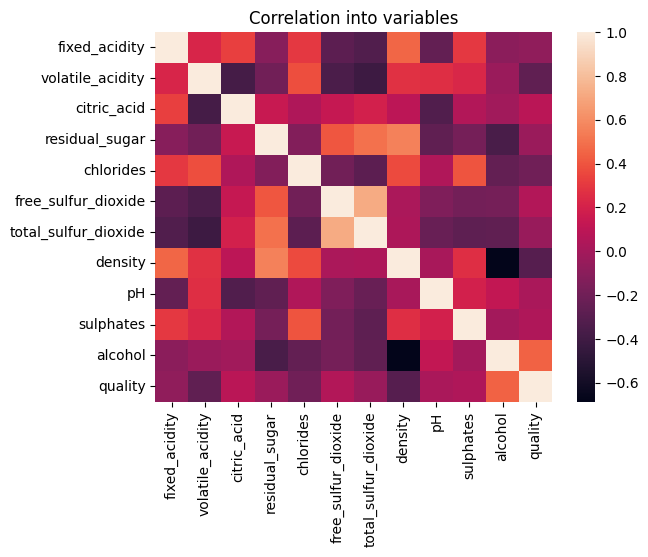

In [395]:
sns.heatmap(data=wine_quality_data.iloc[:,0:12].corr())
plt.title('Correlation into variables')

Text(0.5, 1.0, 'Scatter from Quality x Alcohol')

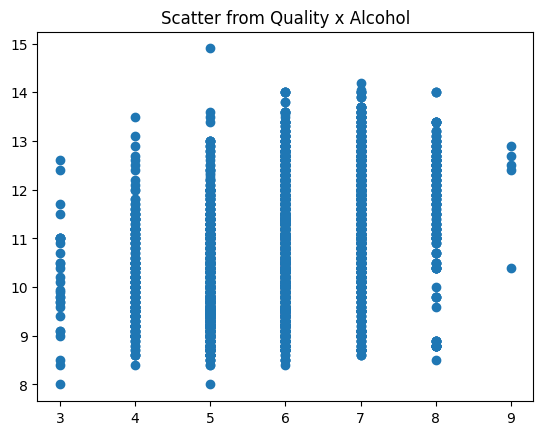

In [396]:
plt.scatter(y=wine_quality_data['alcohol'],x=wine_quality_data['quality'])
plt.title('Scatter from Quality x Alcohol')

([<matplotlib.patches.Wedge at 0x2cf0ff3a4e0>,
 [Text(0.7872560208126489, 0.7682629482763269, 'red'),
  Text(-0.787255999441006, -0.7682629701763211, 'white')],
 [Text(0.42941237498871754, 0.4190525172416328, '25%'),
  Text(-0.42941236333145777, -0.4190525291870842, '75%')])

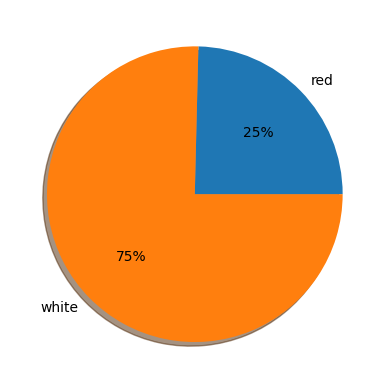

In [397]:
colors,values = np.unique(wine_quality_data['color'], return_counts=True)
plt.pie(x=values,labels=colors,autopct='%1.0f%%',shadow=True)

<Axes: xlabel='citric_acid', ylabel='quality'>

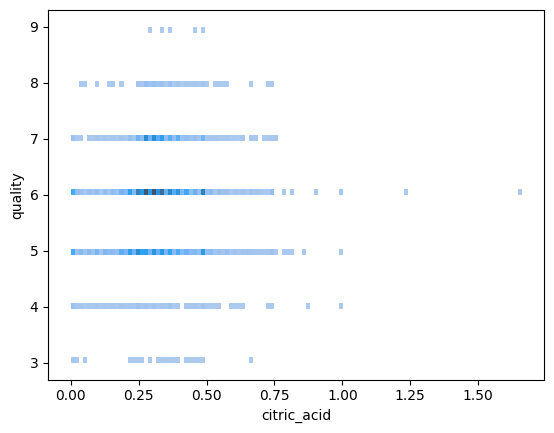

In [398]:
sns.histplot(data=wine_quality_data,x=wine_quality_data['citric_acid'],y=wine_quality_data['quality'])

In [399]:
px.histogram(data_frame=wine_quality_data,x='alcohol',y='quality',title='Sum of Quality by Acohol',color='color')

After Analyse we can try create some Regression Models to predict the quality of the wine

First of all, it'll be need to standardize the data to create our linear regression

In [400]:
standar_regression = StandardScaler()
wine_quality_regression = wine_quality_data.iloc[:,0:12]
wine_quality_regression[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']] = standar_regression.fit_transform(wine_quality_regression[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])

wine_quality_regression

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,5
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,5
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,6
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,6
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,5
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,6
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,7


In [401]:
x = wine_quality_regression.iloc[:,0:11].values
y = wine_quality_regression.iloc[:,11:12].values

Let's create a simple linar Regression

In [402]:
linear_regression = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [403]:
x_train.shape,x_test.shape

((4547, 11), (1950, 11))

In [404]:
y_train.shape,y_test.shape

((4547, 1), (1950, 1))

In [405]:
model_quality_linear_regression = linear_regression.fit(x_train,y_train)

In [406]:
model_quality_linear_regression.coef_

array([[ 0.09120883, -0.2102031 , -0.01089624,  0.21572194, -0.02860199,
         0.0955841 , -0.14045426, -0.17262295,  0.07439176,  0.11265219,
         0.31355039]])

In [407]:
model_quality_linear_regression.intercept_

array([5.82112415])

In [408]:
predict = model_quality_linear_regression.predict(x_test)
predict

array([[5.46883461],
       [6.33504032],
       [5.74599193],
       ...,
       [5.21109266],
       [5.99155387],
       [5.56240898]])

In [409]:
y_test

array([[6],
       [6],
       [6],
       ...,
       [5],
       [6],
       [6]])

In [410]:
print(model_quality_linear_regression.score(x_test,y_test))

0.2874326217380755


In [411]:
mean_squared_error(y_test,predict)

np.float64(0.5525754353017504)

In [412]:
mean_absolute_error(y_test,predict)

np.float64(0.5828001192967349)

Polinomial Linear Regression

In [413]:
poly = PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
x_poly


array([[ 1.        ,  0.14247327,  2.18883292, ...,  0.03124876,
        -0.14814911,  0.7023691 ],
       [ 1.        ,  0.45103572,  3.28223494, ...,  0.33619553,
        -0.19509852,  0.11321814],
       [ 1.        ,  0.45103572,  2.55330026, ...,  0.21424873,
        -0.15574609,  0.11321814],
       ...,
       [ 1.        , -0.55179227, -0.6054167 , ...,  0.19226575,
         0.36747996,  0.7023691 ],
       [ 1.        , -1.32319841, -0.30169391, ...,  3.87137145,
        -7.37012474, 14.0308775 ],
       [ 1.        , -0.93749534, -0.78765037, ...,  2.42571001,
        -1.87397172,  1.44772871]])

In [414]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly,y,test_size=0.3,random_state=0)

In [415]:
x_poly_train.shape,x_poly_test.shape

((4547, 1365), (1950, 1365))

In [416]:
y_poly_train.shape, y_poly_test.shape

((4547, 1), (1950, 1))

In [417]:
poly_model = LinearRegression()
model_poly = poly_model.fit(x_poly_train,y_poly_train)


In [418]:
model_poly.coef_, model_poly.intercept_

(array([[ 6.97022047e-11,  2.74547077e-01,  1.43720867e-02, ...,
         -3.64020685e-02,  1.09826113e-01, -5.08468691e-02]]),
 array([5.66822113]))

In [419]:
predict_poly = model_poly.predict(x_poly_test)
predict_poly

array([[5.31626912],
       [6.35537097],
       [5.62561895],
       ...,
       [4.16286828],
       [6.94272001],
       [4.47607189]])

In [420]:
y_poly_test

array([[6],
       [6],
       [6],
       ...,
       [5],
       [6],
       [6]])

In [421]:
mean_squared_error(y_poly_test,predict_poly)

np.float64(221069.65074204883)

In [422]:
mean_absolute_error(y_poly_test,predict_poly)

np.float64(11.61396142370608)

Neural Network from Regression

In [423]:
neural_network_regression_wine_quality = MLPRegressor(max_iter=1000)
model_neural_network_regression = neural_network_regression_wine_quality.fit(x_train,y_train.ravel())

In [424]:
model_neural_network_regression.score(x_train,y_train)

0.5375232007548492

In [425]:
predict_neural_network = model_neural_network_regression.predict(x_test)
predict_neural_network

array([5.52632931, 6.28495069, 6.19566544, ..., 4.61879409, 6.17273559,
       4.891723  ])

In [426]:
y_test

array([[6],
       [6],
       [6],
       ...,
       [5],
       [6],
       [6]])

In [427]:
model_neural_network_regression.score(x_test,y_test)

0.35102484721053717

In [428]:
mean_squared_error(y_test,predict_neural_network)

np.float64(0.5032614998842129)

In [429]:
mean_absolute_error(y_test,predict_neural_network)

np.float64(0.5451888095876685)

After create some Regression Algoritms, the best that have a good accuracy was Neural Network

Now Let's gonna create some Classification algoritms

In [430]:
standar_regression = StandardScaler()
wine_quality_classifier = wine_quality_data
wine_quality_classifier[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality']] = standar_regression.fit_transform(wine_quality_regression[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality']])
wine_quality_classifier

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,red
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,red
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,red
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,red
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0.207999,white
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,-0.937230,white
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0.207999,white
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,1.353228,white


In [431]:
x = wine_quality_classifier.iloc[:,0:12].values
y = wine_quality_classifier.iloc[:,12:13].values

In [432]:
x.shape, y.shape

((6497, 12), (6497, 1))

In [433]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [434]:
x_train.shape,x_test.shape

((4547, 12), (1950, 12))

In [435]:
y_train.shape,y_test.shape

((4547, 1), (1950, 1))

Gaussian

In [436]:
gaussian = GaussianNB()
model_gaussian = gaussian.fit(x_train,y_train.ravel())
predict_gaussian = model_gaussian.predict(x_test)
predict_gaussian

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [437]:
y_test

array([['white'],
       ['white'],
       ['white'],
       ...,
       ['white'],
       ['white'],
       ['white']], dtype=object)

In [438]:
accuracy_score(y_test,predict_gaussian)

0.9825641025641025

In [439]:
print(classification_report(y_test,predict_gaussian))

              precision    recall  f1-score   support

         red       0.96      0.97      0.96       478
       white       0.99      0.99      0.99      1472

    accuracy                           0.98      1950
   macro avg       0.97      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



Random Forest

In [440]:
randomForest = RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0)
randomForest_model = randomForest.fit(x_train,y_train.ravel())

In [441]:
predict_random_forest = randomForest_model.predict(x_test)
print(classification_report(y_test,predict_random_forest))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       478
       white       1.00      1.00      1.00      1472

    accuracy                           1.00      1950
   macro avg       0.99      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



Neural Network classifier

In [442]:
neural_network_clasifier = MLPClassifier(hidden_layer_sizes=(2,2),activation='relu',max_iter=1000,verbose=True,tol=0.00001,solver='adam')

In [443]:
model_neural_network_classifier = neural_network_clasifier.fit(x_train,y_train)

Iteration 1, loss = 2.06755240
Iteration 2, loss = 1.94487322


c:\Users\mbern\OneDrive\Área de Trabalho\WQ\Wine_Quality\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Iteration 3, loss = 1.83219281
Iteration 4, loss = 1.72578916
Iteration 5, loss = 1.62269910
Iteration 6, loss = 1.52108095
Iteration 7, loss = 1.41741347
Iteration 8, loss = 1.30941547
Iteration 9, loss = 1.20430759
Iteration 10, loss = 1.10525940
Iteration 11, loss = 1.01715602
Iteration 12, loss = 0.94089461
Iteration 13, loss = 0.87428907
Iteration 14, loss = 0.81704393
Iteration 15, loss = 0.76749281
Iteration 16, loss = 0.72510092
Iteration 17, loss = 0.68573833
Iteration 18, loss = 0.65035306
Iteration 19, loss = 0.61760759
Iteration 20, loss = 0.58782141
Iteration 21, loss = 0.56140632
Iteration 22, loss = 0.53582784
Iteration 23, loss = 0.50991219
Iteration 24, loss = 0.48174404
Iteration 25, loss = 0.45051382
Iteration 26, loss = 0.41596847
Iteration 27, loss = 0.37735544
Iteration 28, loss = 0.33675254
Iteration 29, loss = 0.29620163
Iteration 30, loss = 0.25971781
Iteration 31, loss = 0.23085926
Iteration 32, loss = 0.20729994
Iteration 33, loss = 0.18839181
Iteration 34, l

In [444]:
predict_neural_network_classifier = model_neural_network_classifier.predict(x_test)
print(classification_report(y_test,predict_neural_network_classifier))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       478
       white       1.00      1.00      1.00      1472

    accuracy                           1.00      1950
   macro avg       0.99      1.00      0.99      1950
weighted avg       1.00      1.00      1.00      1950

